# Reuters
Treinar um modelo multicamadas usando Keras para a base de dados reuters de tensorflow.keras.datasets.

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=20000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((8982,), (8982,), (2246,), (2246,))

In [ ]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i-3, "?") for i in sentence]
    )
decode_words(reuters.get_word_index(), train_data[2])

'? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in enron corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national intergroup inc of 11 8 mln and ? corp of 15 6 mln reuter 3'

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=20000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")
x_train.shape, y_train.shape, x_test.shape, y_test.shape
     


((8982, 20000), (8982,), (2246, 20000), (2246,))

In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(80, activation='relu', input_shape=(20000,)))

model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 80)                1600080   
                                                                 
 dense_60 (Dense)            (None, 46)                3726      
                                                                 
Total params: 1,603,806
Trainable params: 1,603,806
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_val = x_train[:2000]
partial_x_train = x_train[2000:]

y_val = y_train[:2000]
partial_y_train = y_train[2000:]


In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=11, batch_size=512, verbose = 1,
                    validation_data=(x_val, y_val))
     

Epoch 1/11
14/14 [==============================] - 2s 155ms/step - loss: 0.3744 - accuracy: 0.9255 - val_loss: 0.9133 - val_accuracy: 0.7955
Epoch 2/11
14/14 [==============================] - 2s 139ms/step - loss: 0.3250 - accuracy: 0.9348 - val_loss: 0.8930 - val_accuracy: 0.7995
Epoch 3/11
14/14 [==============================] - 2s 137ms/step - loss: 0.2839 - accuracy: 0.9423 - val_loss: 0.8862 - val_accuracy: 0.8015
Epoch 4/11
14/14 [==============================] - 2s 137ms/step - loss: 0.2493 - accuracy: 0.9466 - val_loss: 0.8798 - val_accuracy: 0.8075
Epoch 5/11
14/14 [==============================] - 3s 207ms/step - loss: 0.2244 - accuracy: 0.9492 - val_loss: 0.8760 - val_accuracy: 0.8045
Epoch 6/11
14/14 [==============================] - 2s 140ms/step - loss: 0.1992 - accuracy: 0.9533 - val_loss: 0.8815 - val_accuracy: 0.8030
Epoch 7/11
14/14 [==============================] - 2s 118ms/step - loss: 0.1814 - accuracy: 0.9556 - val_loss: 0.8753 - val_accuracy: 0.8075
Epoch 

In [ ]:
print(model.evaluate(x_test, y_test))

71/71 [==============================] - 0s 6ms/step - loss: 0.9166 - accuracy: 0.8001
[0.9166142344474792, 0.8000890612602234]


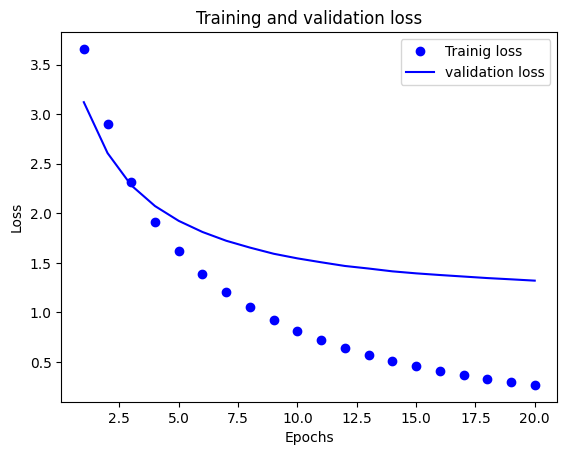

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

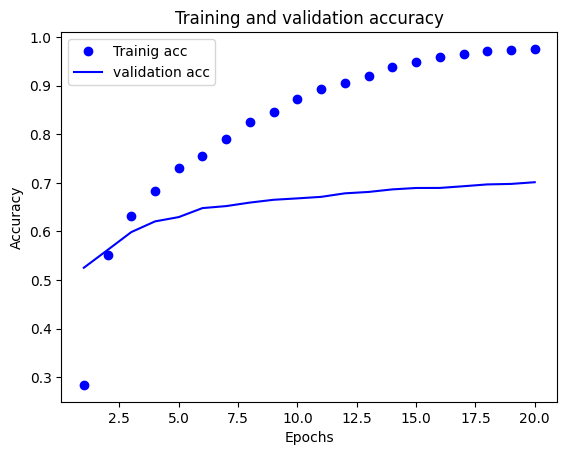

In [ ]:
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Trainig acc")
plt.plot(epochs, val_accuracy_values, "b", label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
     
